In [1]:
import scipy
import scipy.io
from sklearn.neighbors import kneighbors_graph
import numpy as np
import seaborn as sea
import matplotlib.pyplot as plt 
import sklearn.utils.graph_shortest_path as graph_shortest_path
import pandas as pd
import math


In [2]:
mat_data = scipy.io.loadmat('isomap.mat')
data = mat_data['images']
data = data.T
#print(data.shape) #--> (698, 4096)

# We use distance_matrix to find threshold epsilon range.
for i in range(99,102):
    distance_matrix = kneighbors_graph(data, n_neighbors = i, mode='distance', p=2, include_self=False)
    print("When n_neighbors is", i, ", largest distance is", np.amax(distance_matrix.toarray()))

When n_neighbors is 99 , largest distance is 22.370116979246244
When n_neighbors is 100 , largest distance is 22.388619203990135
When n_neighbors is 101 , largest distance is 22.414735265879724


In [3]:
# So threshold spisolon should be smaller than 22.414735265879724 and equal or larger than 22.388619203990135.
# Build adjacency matrix from a distance matrix.

distance_matrix = kneighbors_graph(data, n_neighbors = data.shape[0]-1, mode='distance', p=2, include_self=False)
# Assume self is not a neighbor. Make these zeros to a larger number.
distance_matrix = distance_matrix.toarray()
distance_matrix[distance_matrix==0] = np.amax(distance_matrix) + 1

print("Distance_matrix:")
display(distance_matrix)

#distance_matrix[distance_matrix <= 22.41] = 1

distance_matrix[distance_matrix > 22.41] = 0


adjacency_matrix = distance_matrix
print("Adjacency_matrix:")
display(adjacency_matrix)



Distance_matrix:


array([[35.68716848, 18.83094952,  6.74323967, ..., 21.51126745,
        22.79289298, 18.03618033],
       [18.83094952, 35.68716848, 19.55307161, ..., 15.07435566,
        21.63387369, 20.97399746],
       [ 6.74323967, 19.55307161, 35.68716848, ..., 22.82140093,
        23.24040786, 18.68417978],
       ...,
       [21.51126745, 15.07435566, 22.82140093, ..., 35.68716848,
        23.3365749 , 17.19515048],
       [22.79289298, 21.63387369, 23.24040786, ..., 23.3365749 ,
        35.68716848, 20.31353772],
       [18.03618033, 20.97399746, 18.68417978, ..., 17.19515048,
        20.31353772, 35.68716848]])

Adjacency_matrix:


array([[ 0.        , 18.83094952,  6.74323967, ..., 21.51126745,
         0.        , 18.03618033],
       [18.83094952,  0.        , 19.55307161, ..., 15.07435566,
        21.63387369, 20.97399746],
       [ 6.74323967, 19.55307161,  0.        , ...,  0.        ,
         0.        , 18.68417978],
       ...,
       [21.51126745, 15.07435566,  0.        , ...,  0.        ,
         0.        , 17.19515048],
       [ 0.        , 21.63387369,  0.        , ...,  0.        ,
         0.        , 20.31353772],
       [18.03618033, 20.97399746, 18.68417978, ..., 17.19515048,
        20.31353772,  0.        ]])

Adjacency_matrix_0_1_version:


array([[0., 1., 1., ..., 1., 0., 1.],
       [1., 0., 1., ..., 1., 1., 1.],
       [1., 1., 0., ..., 0., 0., 1.],
       ...,
       [1., 1., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 1.],
       [1., 1., 1., ..., 1., 1., 0.]])

Sum ones in each row of adjacency_matrix_0_1_version, the smallet sum is:
100.0


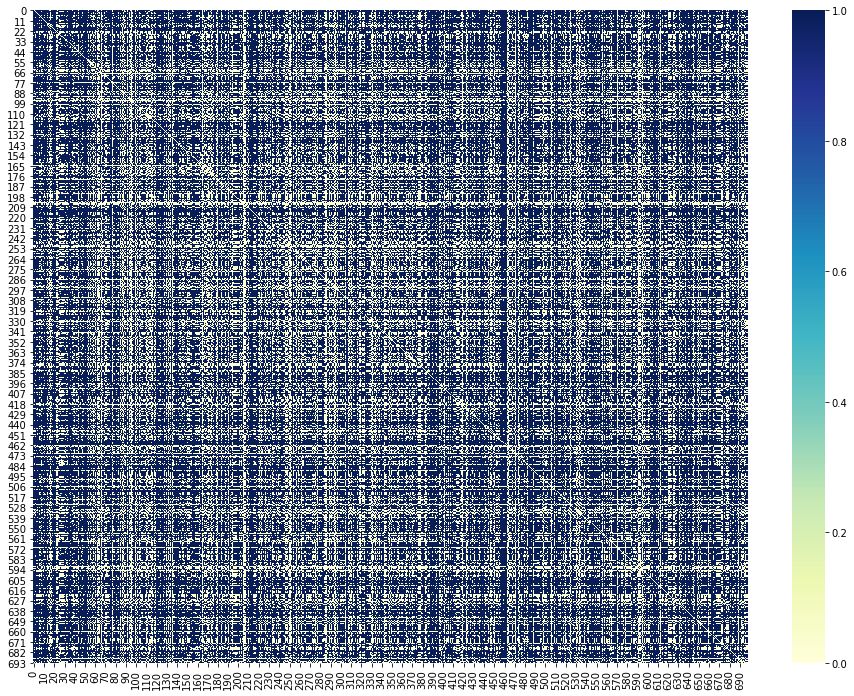

In [4]:
adjacency_matrix_0_1_version = adjacency_matrix.copy()

adjacency_matrix_0_1_version[adjacency_matrix_0_1_version > 0] = 1

print("Adjacency_matrix_0_1_version:")
display(adjacency_matrix_0_1_version)

# Sanity check, sum ones in each row. And confirm that there are at least 100 neighbors (ones) in each row.
print("Sum ones in each row of adjacency_matrix_0_1_version, the smallet sum is:")
print(np.amin(np.sum(adjacency_matrix_0_1_version,axis = 0)))

plt.figure(figsize=(16,12))

# visulize the adjancency_matrix as a heatmap
sea.heatmap(adjacency_matrix_0_1_version, cmap="YlGnBu")
plt.show()

In [5]:
adjacency_matrix[adjacency_matrix==0] = 10000
display(adjacency_matrix)

array([[1.00000000e+04, 1.88309495e+01, 6.74323967e+00, ...,
        2.15112675e+01, 1.00000000e+04, 1.80361803e+01],
       [1.88309495e+01, 1.00000000e+04, 1.95530716e+01, ...,
        1.50743557e+01, 2.16338737e+01, 2.09739975e+01],
       [6.74323967e+00, 1.95530716e+01, 1.00000000e+04, ...,
        1.00000000e+04, 1.00000000e+04, 1.86841798e+01],
       ...,
       [2.15112675e+01, 1.50743557e+01, 1.00000000e+04, ...,
        1.00000000e+04, 1.00000000e+04, 1.71951505e+01],
       [1.00000000e+04, 2.16338737e+01, 1.00000000e+04, ...,
        1.00000000e+04, 1.00000000e+04, 2.03135377e+01],
       [1.80361803e+01, 2.09739975e+01, 1.86841798e+01, ...,
        1.71951505e+01, 2.03135377e+01, 1.00000000e+04]])

In [6]:
D = graph_shortest_path.graph_shortest_path(adjacency_matrix, method = 'FW')

# Sanity check, check the longest pariwise distance in the shortest distance matrix D
print("Longest distance in D:",np.amax(D))

# Note: in D, self distance is zero.
display(D)

Longest distance in D: 49.269770983092066


array([[ 0.        , 18.83094952,  6.74323967, ..., 21.51126745,
        28.50709299, 18.03618033],
       [18.83094952,  0.        , 19.55307161, ..., 15.07435566,
        21.63387369, 20.97399746],
       [ 6.74323967, 19.55307161,  0.        , ..., 25.28807222,
        26.95043353, 18.68417978],
       ...,
       [21.51126745, 15.07435566, 25.28807222, ...,  0.        ,
        28.34440857, 17.19515048],
       [28.50709299, 21.63387369, 26.95043353, ..., 28.34440857,
         0.        , 20.31353772],
       [18.03618033, 20.97399746, 18.68417978, ..., 17.19515048,
        20.31353772,  0.        ]])

In [7]:
# For a better understanding, reference code for graph_shortest_path.graph_shortest_path
def shortest_paths(adj, alg = "Floyd1"):
    (n,m) = adj.shape
    assert n == m
    if alg == "Floyd1":
        for k in range(n):
            adj = np.minimum( adj, np.add.outer(adj[:,k],adj[k,:]) )
        return adj

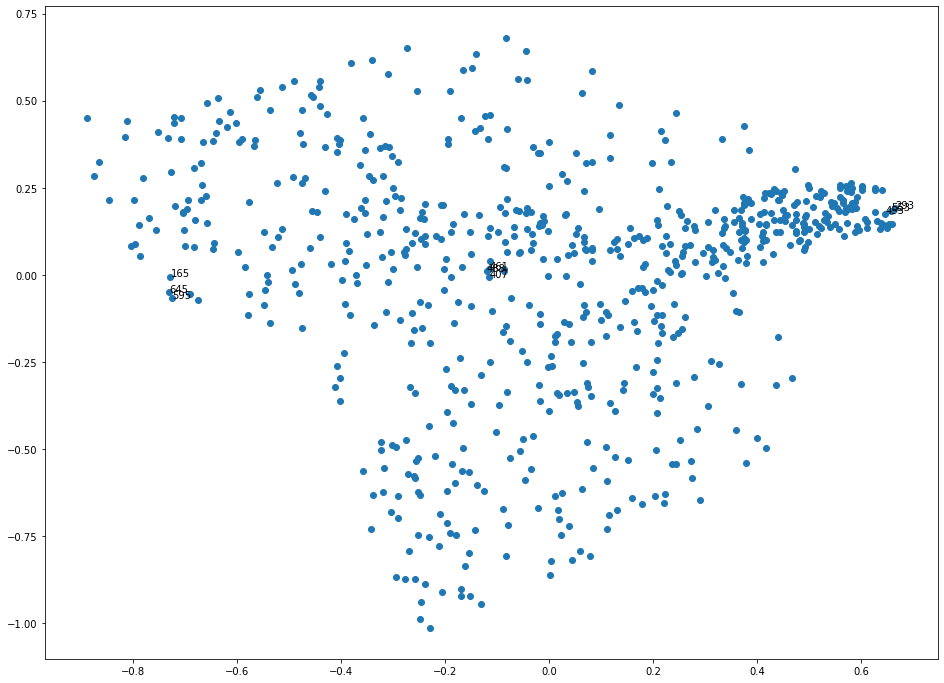

In [8]:
m = data.shape[0] 
I = np.identity(m) 
one_vector = np.ones((m,m)) 

# get the centering matrix
H = I - (1/m)*one_vector 
C = (-1/(2*m))*((H.dot(np.square(D))).dot(H)) 

# These are vectors of matrix C. Values are in ascendiing order.
vals, vecs = np.linalg.eigh(C)


dim1 = vecs[:,-1] * math.sqrt(vals[-1])
dim2 = vecs[:,-2] * math.sqrt(vals[-2])

plt.figure(figsize=(16,12))

plt.scatter(dim1, dim2)
labels = [i for i in range(698)]
for x, y, label in zip(dim1, dim2, labels):
    if label in [165,645,595,461,488,407,293,553,453]:
        plt.annotate(label, xy=(x, y))


<Figure size 1152x864 with 0 Axes>

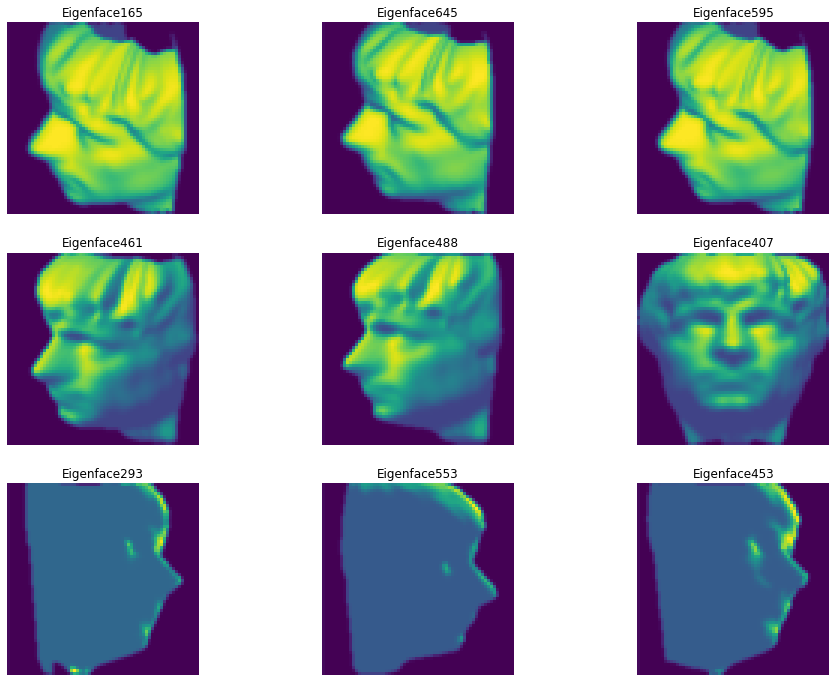

In [9]:
plt.figure(figsize=(16,12))

image_list= [165,645,595,461,488,407,293,553,453]

plt.figure(figsize=(16,12))
for i in image_list:
        face_reshape = np.reshape(data[i,:], (64,64)).T # reshape the data to its original form
        plt.subplot(3,3,image_list.index(i)+1)
        plt.title('Eigenface'+str(i))
        plt.imshow(face_reshape)
        plt.axis('off')
        

In [10]:
# K = 6

mat_data = scipy.io.loadmat('isomap.mat')
data = mat_data['images']
data = data.T
#print(data.shape) #--> (698, 4096)

# We use distance_matrix to find threshold epsilon range.
for i in range(5,8):
    distance_matrix = kneighbors_graph(data, n_neighbors = i, mode='distance', p=2, include_self=False)
    print("When n_neighbors is", i, ", largest distance is", np.amax(distance_matrix.toarray()))

When n_neighbors is 5 , largest distance is 12.608219944583977
When n_neighbors is 6 , largest distance is 12.73904330960109
When n_neighbors is 7 , largest distance is 13.167654406161162


In [11]:
# Build adjacency matrix from a distance matrix.

distance_matrix = kneighbors_graph(data, n_neighbors = data.shape[0]-1, mode='distance', p=2, include_self=False)
# Assume self is not a neighbor. Make these zeros to a larger number.
distance_matrix = distance_matrix.toarray()
distance_matrix[distance_matrix==0] = np.amax(distance_matrix) + 1

print("Distance_matrix:")
display(distance_matrix)

#distance_matrix[distance_matrix <= 22.41] = 1

distance_matrix[distance_matrix > 12.8] = 0


adjacency_matrix = distance_matrix
print("Adjacency_matrix:")
display(adjacency_matrix)

Distance_matrix:


array([[35.68716848, 18.83094952,  6.74323967, ..., 21.51126745,
        22.79289298, 18.03618033],
       [18.83094952, 35.68716848, 19.55307161, ..., 15.07435566,
        21.63387369, 20.97399746],
       [ 6.74323967, 19.55307161, 35.68716848, ..., 22.82140093,
        23.24040786, 18.68417978],
       ...,
       [21.51126745, 15.07435566, 22.82140093, ..., 35.68716848,
        23.3365749 , 17.19515048],
       [22.79289298, 21.63387369, 23.24040786, ..., 23.3365749 ,
        35.68716848, 20.31353772],
       [18.03618033, 20.97399746, 18.68417978, ..., 17.19515048,
        20.31353772, 35.68716848]])

Adjacency_matrix:


array([[0.        , 0.        , 6.74323967, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [6.74323967, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [12]:
# Sanity check, sum ones in each row. And confirm that there are at least 6 neighbors (ones) in each row.
temp = adjacency_matrix.copy()

temp[temp > 0] = 1

display(temp)

np.amin(np.sum(temp,axis = 0))

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

6.0

In [13]:
adjacency_matrix[adjacency_matrix==0] = 10000
display(adjacency_matrix)

array([[1.00000000e+04, 1.00000000e+04, 6.74323967e+00, ...,
        1.00000000e+04, 1.00000000e+04, 1.00000000e+04],
       [1.00000000e+04, 1.00000000e+04, 1.00000000e+04, ...,
        1.00000000e+04, 1.00000000e+04, 1.00000000e+04],
       [6.74323967e+00, 1.00000000e+04, 1.00000000e+04, ...,
        1.00000000e+04, 1.00000000e+04, 1.00000000e+04],
       ...,
       [1.00000000e+04, 1.00000000e+04, 1.00000000e+04, ...,
        1.00000000e+04, 1.00000000e+04, 1.00000000e+04],
       [1.00000000e+04, 1.00000000e+04, 1.00000000e+04, ...,
        1.00000000e+04, 1.00000000e+04, 1.00000000e+04],
       [1.00000000e+04, 1.00000000e+04, 1.00000000e+04, ...,
        1.00000000e+04, 1.00000000e+04, 1.00000000e+04]])

In [14]:
D = graph_shortest_path.graph_shortest_path(adjacency_matrix, method = 'FW')

# Sanity check, check the longest pariwise distance in the shortest distance matrix D
print("Longest distance in D:",np.amax(D))

# Note: in D, self distance is zero.
display(D)

Longest distance in D: 90.99930865040656


array([[ 0.        , 37.48264562,  6.74323967, ..., 32.90985578,
        41.98377157, 22.12792861],
       [37.48264562,  0.        , 37.48034249, ..., 19.38947669,
        31.94099475, 45.12365034],
       [ 6.74323967, 37.48034249,  0.        , ..., 35.57363044,
        41.2541491 , 21.9105186 ],
       ...,
       [32.90985578, 19.38947669, 35.57363044, ...,  0.        ,
        41.02992069, 27.57515949],
       [41.98377157, 31.94099475, 41.2541491 , ..., 41.02992069,
         0.        , 35.20523484],
       [22.12792861, 45.12365034, 21.9105186 , ..., 27.57515949,
        35.20523484,  0.        ]])

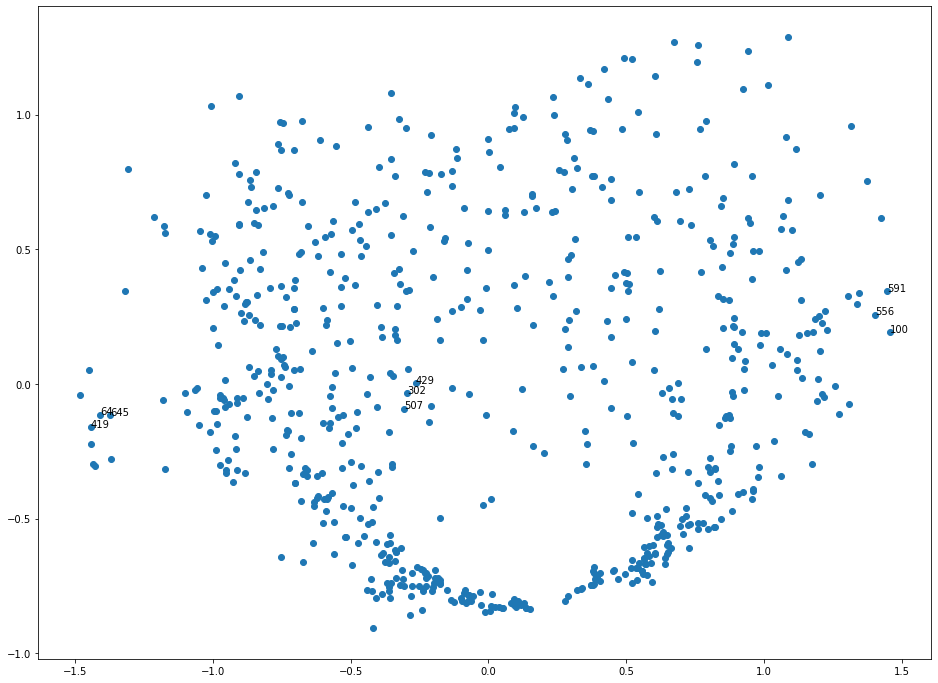

In [15]:
m = data.shape[0] 
I = np.identity(m) 
one_vector = np.ones((m,m)) 

# get the centering matrix
H = I - (1/m)*one_vector 
C = (-1/(2*m))*((H.dot(np.square(D))).dot(H)) 

# These are vectors of matrix C. Values are in ascendiing order.
vals, vecs = np.linalg.eigh(C)


dim1 = vecs[:,-1] * math.sqrt(vals[-1])
dim2 = vecs[:,-2] * math.sqrt(vals[-2])


#dim2 = top2_vecs[:,1] * math.sqrt(-top2_vals[1])

plt.figure(figsize=(16,12))

plt.scatter(dim1, dim2)
labels = [i for i in range(698)]
for x, y, label in zip(dim1, dim2, labels):
    if label in [64,645,419,429,302,507,591,556,100]:
        plt.annotate(label, xy=(x, y))


<Figure size 1152x864 with 0 Axes>

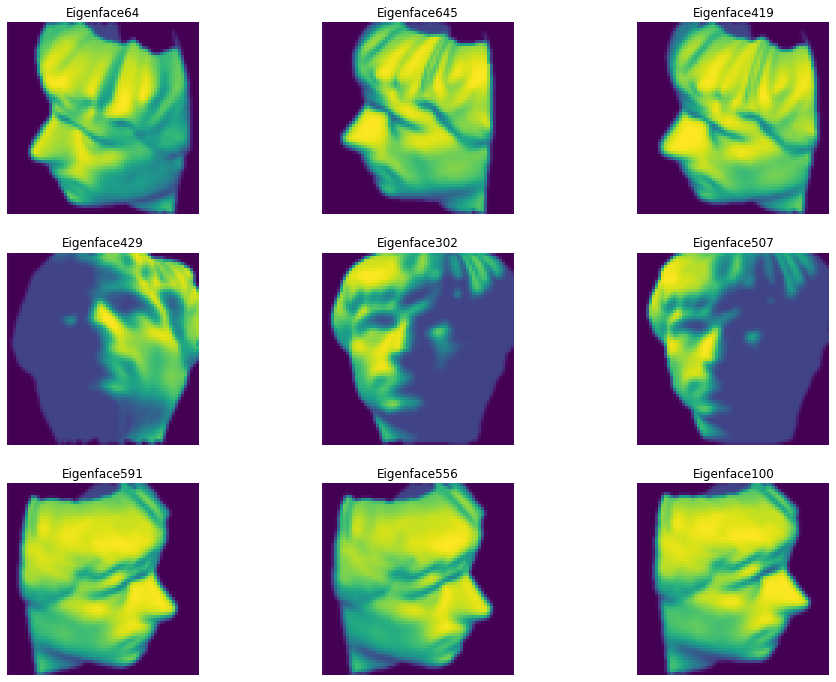

In [16]:
plt.figure(figsize=(16,12))

image_list= [64,645,419,429,302,507,591,556,100]

plt.figure(figsize=(16,12))
for i in image_list:
        face_reshape = np.reshape(data[i,:], (64,64)).T # reshape the data to its original form
        plt.subplot(3,3,image_list.index(i)+1)
        plt.title('Eigenface'+str(i))
        plt.imshow(face_reshape)
        plt.axis('off')
        

In [17]:
# Manhattan Distance

mat_data = scipy.io.loadmat('isomap.mat')
data = mat_data['images']
data = data.T
#print(data.shape) #--> (698, 4096)

# We use distance_matrix to find threshold epsilon range.
for i in range(99,102):
    distance_matrix = kneighbors_graph(data, n_neighbors = i, mode='distance', p=1, include_self=False)
    print("When n_neighbors is", i, ", largest distance is", np.amax(distance_matrix.toarray()))

When n_neighbors is 99 , largest distance is 1008.2185968137253
When n_neighbors is 100 , largest distance is 1009.6008272058805
When n_neighbors is 101 , largest distance is 1011.0060661764716


In [18]:
# Build adjacency matrix from a distance matrix.

distance_matrix = kneighbors_graph(data, n_neighbors = data.shape[0]-1, mode='distance', p=1, include_self=False)
# Assume self is not a neighbor. Make these zeros to a larger number.
distance_matrix = distance_matrix.toarray()
distance_matrix[distance_matrix==0] = np.amax(distance_matrix) + 1

print("Distance_matrix:")
display(distance_matrix)

#distance_matrix[distance_matrix <= 22.41] = 1

distance_matrix[distance_matrix > 1010] = 0


adjacency_matrix = distance_matrix
print("Adjacency_matrix:")
display(adjacency_matrix)

Distance_matrix:


array([[1902.19515931,  965.31026348,  257.36994485, ..., 1073.33045343,
        1083.13501838,  801.11789216],
       [ 965.31026348, 1902.19515931,  998.80539216, ...,  591.33363971,
        1041.83131127, 1054.478125  ],
       [ 257.36994485,  998.80539216, 1902.19515931, ..., 1152.43014706,
        1123.03106618,  854.53792892],
       ...,
       [1073.33045343,  591.33363971, 1152.43014706, ..., 1902.19515931,
        1070.02515319,  736.96179534],
       [1083.13501838, 1041.83131127, 1123.03106618, ..., 1070.02515319,
        1902.19515931,  906.32530637],
       [ 801.11789216, 1054.478125  ,  854.53792892, ...,  736.96179534,
         906.32530637, 1902.19515931]])

Adjacency_matrix:


array([[  0.        , 965.31026348, 257.36994485, ...,   0.        ,
          0.        , 801.11789216],
       [965.31026348,   0.        , 998.80539216, ..., 591.33363971,
          0.        ,   0.        ],
       [257.36994485, 998.80539216,   0.        , ...,   0.        ,
          0.        , 854.53792892],
       ...,
       [  0.        , 591.33363971,   0.        , ...,   0.        ,
          0.        , 736.96179534],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        , 906.32530637],
       [801.11789216,   0.        , 854.53792892, ..., 736.96179534,
        906.32530637,   0.        ]])

In [19]:
# Sanity check, sum ones in each row. And confirm that there are at least 100 neighbors (ones) in each row.
temp = adjacency_matrix.copy()

temp[temp > 0] = 1

display(temp)

np.amin(np.sum(temp,axis = 0))

array([[0., 1., 1., ..., 0., 0., 1.],
       [1., 0., 1., ..., 1., 0., 0.],
       [1., 1., 0., ..., 0., 0., 1.],
       ...,
       [0., 1., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 1., ..., 1., 1., 0.]])

100.0

In [20]:
adjacency_matrix[adjacency_matrix==0] = 100000
display(adjacency_matrix)

array([[100000.        ,    965.31026348,    257.36994485, ...,
        100000.        , 100000.        ,    801.11789216],
       [   965.31026348, 100000.        ,    998.80539216, ...,
           591.33363971, 100000.        , 100000.        ],
       [   257.36994485,    998.80539216, 100000.        , ...,
        100000.        , 100000.        ,    854.53792892],
       ...,
       [100000.        ,    591.33363971, 100000.        , ...,
        100000.        , 100000.        ,    736.96179534],
       [100000.        , 100000.        , 100000.        , ...,
        100000.        , 100000.        ,    906.32530637],
       [   801.11789216, 100000.        ,    854.53792892, ...,
           736.96179534,    906.32530637, 100000.        ]])

In [21]:
D = graph_shortest_path.graph_shortest_path(adjacency_matrix, method = 'FW')

# Sanity check, check the longest pariwise distance in the shortest distance matrix D
print("Longest distance in D:",np.amax(D))

# Note: in D, self distance is zero.
display(D)

Longest distance in D: 2295.6090992647087


array([[   0.        ,  965.31026348,  257.36994485, ..., 1180.2359375 ,
        1333.1890625 ,  801.11789216],
       [ 965.31026348,    0.        ,  998.80539216, ...,  591.33363971,
        1219.31158088, 1257.4520527 ],
       [ 257.36994485,  998.80539216,    0.        , ..., 1292.46237745,
        1314.56237745,  854.53792892],
       ...,
       [1180.2359375 ,  591.33363971, 1292.46237745, ...,    0.        ,
        1235.02527574,  736.96179534],
       [1333.1890625 , 1219.31158088, 1314.56237745, ..., 1235.02527574,
           0.        ,  906.32530637],
       [ 801.11789216, 1257.4520527 ,  854.53792892, ...,  736.96179534,
         906.32530637,    0.        ]])

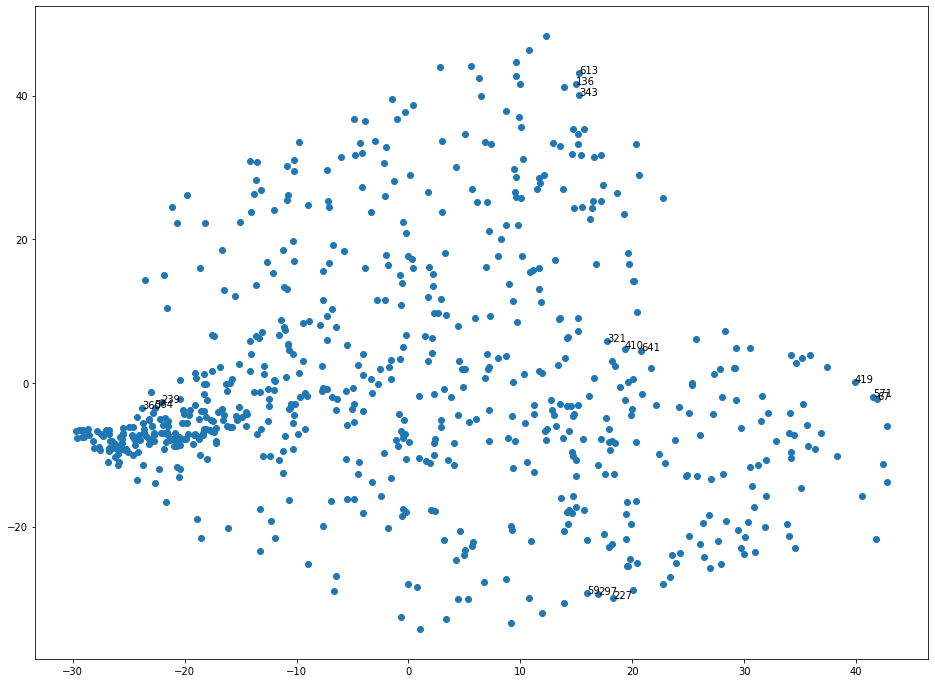

In [22]:
m = data.shape[0] 
I = np.identity(m) 
one_vector = np.ones((m,m)) 

# get the centering matrix
H = I - (1/m)*one_vector 
C = (-1/(2*m))*((H.dot(np.square(D))).dot(H)) 

# These are vectors of matrix C. Values are in ascendiing order.
vals, vecs = np.linalg.eigh(C)


dim1 = vecs[:,-1] * math.sqrt(vals[-1])
dim2 = vecs[:,-2] * math.sqrt(vals[-2])


#dim2 = top2_vecs[:,1] * math.sqrt(-top2_vals[1])

plt.figure(figsize=(16,12))

plt.scatter(dim1, dim2)
labels = [i for i in range(698)]
for x, y, label in zip(dim1, dim2, labels):
    if label in [613,136,343,321,410,641,59,297,227,360,564,239,419,571,67]:
        plt.annotate(label, xy=(x, y))


<Figure size 1152x864 with 0 Axes>

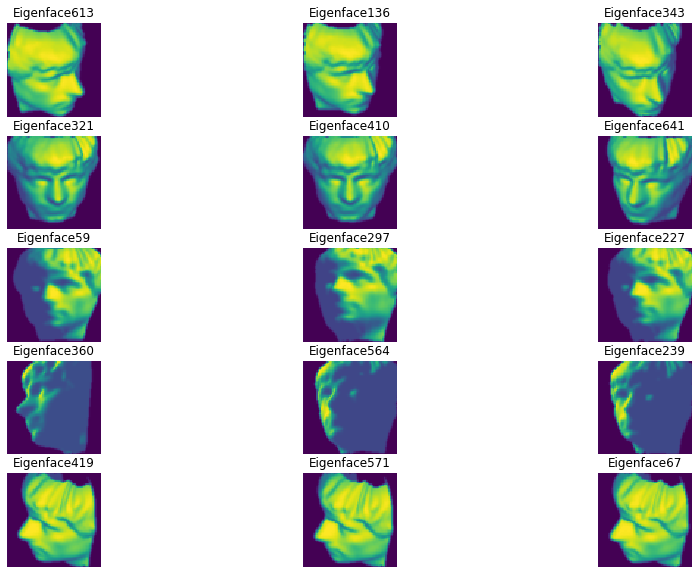

In [23]:
plt.figure(figsize=(16,12))

image_list= [613,136,343,321,410,641,59,297,227,360,564,239,419,571,67]

plt.figure(figsize=(15,10))
for i in image_list:
        face_reshape = np.reshape(data[i,:], (64,64)).T
        plt.subplot(5,3,image_list.index(i)+1)
        plt.title('Eigenface'+str(i))
        plt.imshow(face_reshape)
        plt.axis('off')
        